In [1]:
import rasterio
import rasterio.plot
import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pprint

{'blockxsize': 192,
 'blockysize': 176,
 'compress': 'packbits',
 'count': 1,
 'crs': CRS({'init': 'epsg:32611'}),
 'driver': 'GTiff',
 'dtype': 'float64',
 'height': 1684,
 'interleave': 'band',
 'nodata': None,
 'tiled': True,
 'transform': Affine(29.999999999999705, 0.0, 254150.4675894332,
       0.0, -29.999999999999723, 4229820.934460746),
 'width': 1777}


1684

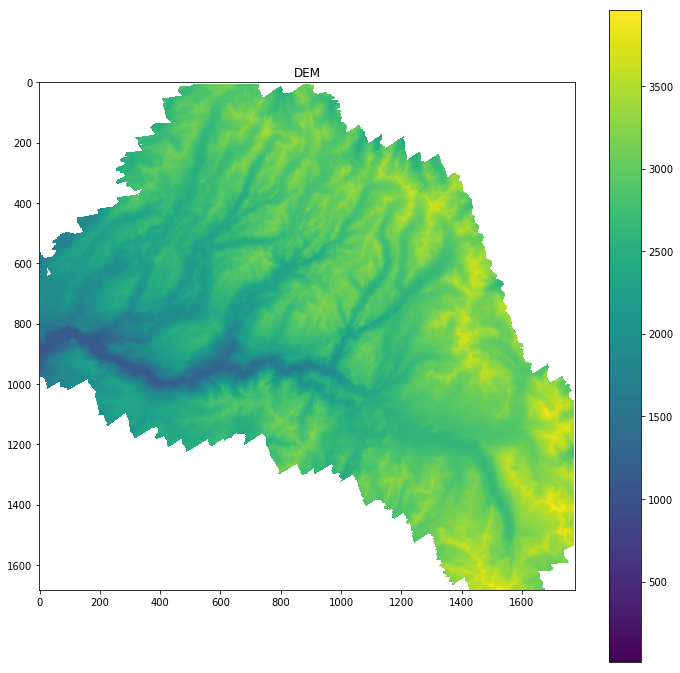

In [21]:
with rasterio.open('./snowmelt_data/data/dem30m.tif') as raster:
    pprint.pprint(raster.profile)
    r = raster.read(1, out_shape = (1, raster.height, raster.width))
    plt.figure(figsize = (12,12))
    plt.imshow(r)
    plt.colorbar()
    plt.title('DEM')
    
len(r)

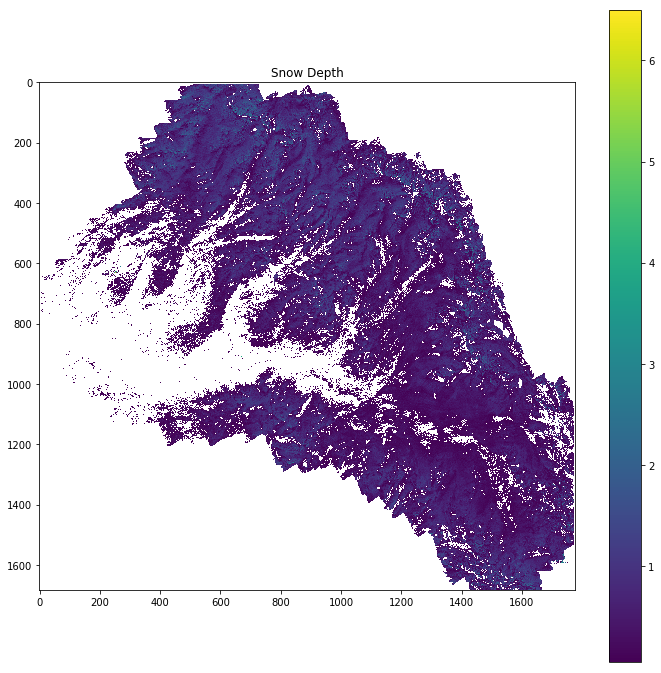

In [3]:
with rasterio.open('./snowmelt_data/data/2015_snow_depth/TB20150217_18_SUPERsnow_depth.tif_mean30m.tif') as raster:
    #pprint.pprint(raster.profile)
    r = raster.read(1, out_shape = (1, raster.height, raster.width))
    plt.figure(figsize = (12,12))
    plt.imshow(r)
    plt.colorbar()
    plt.title('Snow Depth')


In [7]:

dates = ['0217_18', '0305_06', '0325', '0403', '0409', '0415', '0427', '0501', '0528', '0608']
depth_arrays = []

for date in dates:
    with rasterio.open(f'./snowmelt_data/data/2015_snow_depth/TB2015{date}_SUPERsnow_depth.tif_mean30m.tif') as raster:
        depth_arrays.append(raster.read(1, out_shape = (1, raster.height, raster.width)))


#fig, axes = plt.subplots(nrows=5, ncols=2, sharex=True, sharey=True, figsize=(10,10))
#index = range(len(depth_arrays))
#print(index)
#for i in index:
#    axes[i] = plt.subplot(5,2,i+1)
#    plt.imshow(depth_arrays[i])
#plt.tight_layout()

In [12]:
print(len(depth_arrays))
print(depth_arrays[0])

10
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [13]:
depth_2015 = np.asarray(depth_arrays)

In [16]:
for i in range(len(depth_2015)):
    depth_2015[i] = np.nan_to_num(depth_2015[i])

In [15]:
diffs_2015 = []
for i in range(len(depth_2015)-1):
    diffs_2015.append(depth_2015[i]-depth_2015[i+1])
    
pprint.pprint(diffs_2015)

[array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ...

In [ ]:
mean_snow